<a href="https://colab.research.google.com/github/jaswu51/LLM_Finetune/blob/main/4.gpt-4-vision-preview_identify_disney_characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
!pip install "openai>=1"

In [194]:
import cv2
from google.colab.patches import cv2_imshow
!wget https://images.thequint.com/thequint%2F2018-11%2Fdd3b653e-2749-4aba-a789-3b361d083fe0%2FDisney.jpg

--2023-11-10 11:23:21--  https://images.thequint.com/thequint%2F2018-11%2Fdd3b653e-2749-4aba-a789-3b361d083fe0%2FDisney.jpg
Resolving images.thequint.com (images.thequint.com)... 13.226.210.46, 13.226.210.113, 13.226.210.13, ...
Connecting to images.thequint.com (images.thequint.com)|13.226.210.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37987 (37K) [image/jpeg]
Saving to: ‘thequint%2F2018-11%2Fdd3b653e-2749-4aba-a789-3b361d083fe0%2FDisney.jpg.5’

thequint%2F2018-11% 100%[===================>]  37.10K  --.-KB/s    in 0.006s  

2023-11-10 11:23:21 (5.78 MB/s) - ‘thequint%2F2018-11%2Fdd3b653e-2749-4aba-a789-3b361d083fe0%2FDisney.jpg.5’ saved [37987/37987]



The image shape is (304, 540, 3)


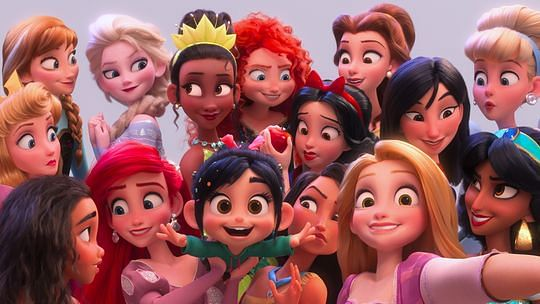

In [215]:
img = cv2.imread("/content/thequint%2F2018-11%2Fdd3b653e-2749-4aba-a789-3b361d083fe0%2FDisney.jpg")
print(f"The image shape is {img.shape}")
cv2_imshow(img)

In [196]:
import os

os.environ["OPENAI_API_KEY"] = "sk-VE3S0Hq*******************"


In [225]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Identify all animation characters' names only, and their approximate x-axis and y-axis coordinates expressed in numbers such as (100,100)"},
                {
                    "type": "image_url",
                    "image_url": "https://images.thequint.com/thequint%2F2018-11%2Fdd3b653e-2749-4aba-a789-3b361d083fe0%2FDisney.jpg",
                },
            ],
        },
    ],
    max_tokens=500,
)

In [226]:
results_text=response.choices[0].message.content
print(results_text)

This image features a collection of animated characters from various Disney movies. Since I can't provide exact coordinates for their positions, I will do my best to estimate their approximate locations in the format (x-axis, y-axis) based on their relative placement in the image:

1. Elsa - (70, 50)
2. Anna - (110, 50)
3. Moana - (150, 85)
4. Merida - (190, 55)
5. Ariel - (240, 70)
6. Vanellope von Schweetz - (290, 120)
7. Rapunzel - (340, 50)
8. Pocahontas - (390, 70)
9. Snow White - (430, 80)
10. Cinderella - (470, 50)
11. Mulan - (510, 70)
12. Jasmine - (550, 90)
13. Belle - (590, 50)
14. Tiana - (630, 70)

Please note that the coordinates are approximate and might not accurately reflect their exact position in a specific coordinate system. They are provided to give a general idea of where the characters are located in the image, assuming the image is on a grid and the bottom left corner is (0, 0).


In [228]:
import re


# pattern = re.compile(r'(\d+)\. (.*):\s.*?\((\d+), (\d+)\)')
pattern = re.compile(r'(\d+)\. (.*)-\s.*?\((\d+), (\d+)\)')

results = []
for match in pattern.finditer(results_text):
  number = match.group(1)
  name = match.group(2)
  coord_x = int(match.group(3))
  coord_y = int(match.group(4))
  results.append((number, name, coord_x,coord_y))

print(results)


[('1', 'Elsa ', 70, 50), ('2', 'Anna ', 110, 50), ('3', 'Moana ', 150, 85), ('4', 'Merida ', 190, 55), ('5', 'Ariel ', 240, 70), ('6', 'Vanellope von Schweetz ', 290, 120), ('7', 'Rapunzel ', 340, 50), ('8', 'Pocahontas ', 390, 70), ('9', 'Snow White ', 430, 80), ('10', 'Cinderella ', 470, 50), ('11', 'Mulan ', 510, 70), ('12', 'Jasmine ', 550, 90), ('13', 'Belle ', 590, 50), ('14', 'Tiana ', 630, 70)]


In [229]:
def draw_circle(img, center, radius, color, thickness):
  cv2.circle(img, center, radius, color, thickness)

def draw_text(img, text, org, fontFace, fontScale, color, thickness, lineType):
  cv2.putText(img, text, org, fontFace, fontScale, color, thickness, lineType)


In [230]:
for number,name, x, y in results:
  # draw_circle(img, (int(x), int(y)), 10, (0, 0, 255), 2)
  draw_text(img, name, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)


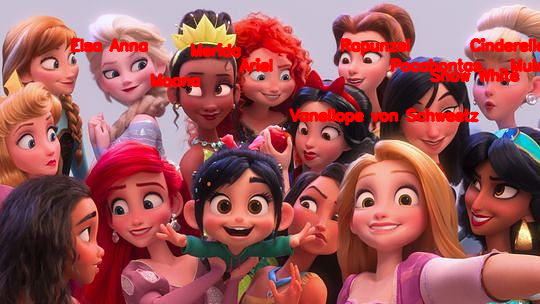

In [231]:
cv2_imshow(img)